In [ ]:
from sklearn.datasets import fetch_california_housing
import torch

# Charger les données
data = fetch_california_housing()

X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.float32).reshape(-1, 1)

y.shape



torch.Size([20640, 1])

In [2]:
from  core import model,layres,losses,metrics,optimizers
from utils import initializers
import torch

In [3]:
MLp_model=model.Deep_learning_Model(
    "adam","Mse"
)

In [4]:
########## Adding Layers to the model  ##############
# layer with xavier intilaztion 
layer=layres.Layer(X.shape[1],128,"Xaviernormal","lakyrelu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)

layer=layres.Layer(128,64,"Xaviernormal","lakyrelu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)

layer=layres.Layer(64,5,"Xaviernormal","lakyrelu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)


layer=layres.Layer(5,1,"Xaviernormal")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)



In [5]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")



 xtrain_shape :torch.Size([14447, 8]) , x_test_shape:torch.Size([6193, 8]) ytrain_shape:torch.Size([14447, 1]) ytest_shape:torch.Size([6193, 1])


In [6]:
train_losses,val_losses=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.01)


1 : train_loss: 0.39731571078300476  | val_loss:0.5900992751121521
2 : train_loss: 0.4192999005317688  | val_loss:0.4521849751472473
3 : train_loss: 0.2623424828052521  | val_loss:0.5101507902145386
4 : train_loss: 3.2342326641082764  | val_loss:2.7411022186279297
5 : train_loss: 0.6342145204544067  | val_loss:0.4863975942134857
6 : train_loss: 0.3509041368961334  | val_loss:0.3748655319213867
7 : train_loss: 0.23090556263923645  | val_loss:0.3257719576358795
8 : train_loss: 0.2087857574224472  | val_loss:0.30921104550361633
9 : train_loss: 0.30051663517951965  | val_loss:0.30905184149742126
10 : train_loss: 0.4120737314224243  | val_loss:0.30177006125450134
11 : train_loss: 0.43554550409317017  | val_loss:0.31734612584114075
12 : train_loss: 0.21007001399993896  | val_loss:0.2972019910812378
13 : train_loss: 0.22009766101837158  | val_loss:0.30435338616371155
14 : train_loss: 0.24982593953609467  | val_loss:0.3947356045246124
15 : train_loss: 0.2589796185493469  | val_loss:0.315042525

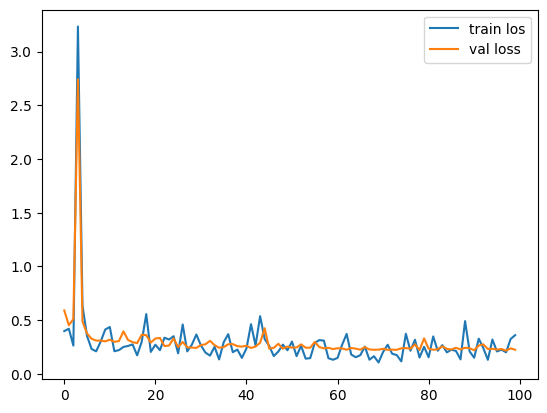

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()